# PART I : QUESTION BASED

In [1]:
import pandas as pd;
import numpy as np;
import scipy.stats as stats
import matplotlib.pyplot as plt;
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

## Question 1

In [2]:
table  = pd.DataFrame([[400,100,500],[200,1300,1500],[600,1400,2000]],columns=["Actually placed and order for Product A - Yes","Actually placed and order for Product A - No","Total"],index=["Yes","No","Total"])
table.index.name = "Planned to purchase Product A"

table

,Actually placed and order for Product A - Yes,Actually placed and order for Product A - No,Total
Planned to purchase Product A,,,
Yes,400,100,500
No,200,1300,1500
Total,600,1400,2000


### Question 1.1 : Find Joint Probability of the people who planned to purchase and placed an order.
#### Solution : 
Joint Probability  is
 ```
     P( Planned and Placed)  =  400 /2000 = 0.2
 ```
 from table 

### Question 1.2 : Find Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase?

#### Solution: 
From the table Probability is 400/600 = 0.63


## Question 2

#### Given Info:
Sample of 10 items, Probability of failure : 5% = 0.05

### A: Probability that none of the items are defective

#### Solution:
> The distribution is <b>binomial</b> here, with n =10, p = 0.05
> Probability of none of items being defective is

(1-p)<sup>n</sup> = (1- 0.05) <sup>10</sup>

In [ ]:
pow(1-0.05,10)

Answer is 0.598 ~= 0.6 

Verifying the same using scipy stats library

In [ ]:
n=10
p=0.05
k=np.arange(0,n+1)
binomial = stats.binom.pmf(k,n,p)
print(binomial)

In [ ]:
print(binomial[0]," is probability that none are defective")

### B : Probability that exactly one of the items is defective

#### Solution: 
From the above computation, this value is binomial[1], which is mathematically computed as 
n<sub>c<sub>1</sub></sub> (p<sup>1</sup>)((1-p)<sup>(n-1)</sup>) :

In [ ]:
print(binomial[1])

### C: Probability that two or fewer of the items are defective


#### Solution
Probability that two or fewer

= Prob (None) + Prob(1) + Prob(2)

= binomial[0] + binomial[1] + binomial[2]

In [ ]:
print(sum(binomial[0:3])," is the Answer")

#### D : Probability that three or more of them are defective:


### Solution 
Prob ( 3 and more)
= Prob(3) + Prob(4) + ...Prob(10)

= binomial[3] + binomial[4]+ .. binomial[10]

= 1 - (binomial[0] + binomial[1]+ binomial[2]) 

In [ ]:
print(1- sum(binomial[0:3]), " is the answer")
print(sum(binomial[3:]), " is the answer")


## Question 3

#### Given Info :
Avg cars per week = 3

### A: Probability that in given week he will sell some cars 
#### Solution : 

- Some cars => one or more
- The distribution is poisson so
```
    P(some cars)= P(one or more)
                = 1 - P(no cars)
```

In [ ]:
n = np.arange(0,20);
rate = 3;
poisson_dist = stats.poisson.pmf(n,rate)
print('Probability of some cars being sold in a given week is ', 1-poisson_dist[0])

### B: Probability that in a given week he will sell 2 or more but less than 5 cars.

#### Solution:

Sell 2 or more but less than 5 cars 
- is equivalent to Prob(2) + Prob(3) + Prob(4)

In [ ]:
print(sum(poisson_dist[2:5]), " is the prob that in a given week he will sell 2 or more but less than 5 cars")

### C: Plot the poisson Dist function for Cumulative probability of cars sold per week Vs number of cars per week. 


In [ ]:
cumulative_dist= stats.poisson.cdf(n,rate)
fig, (ax1, ax2) = plt.subplots(1,2);
ax1.set_title("Cumulative Probability Distribution")
ax1.set_xlabel("number of cars sold per week");
ax1.plot(n,cumulative_dist,'o-');
ax2.set_title("Probability mass function");
ax2.set_xlabel("number of cars sold per week");
ax2.plot(n,poisson_dist,'o-');
fig.tight_layout()

## Question 4

#### Given Info:
percentage of orders that are accurate = 86.8%.
No of orders = 3

### A: Probability that all three orders are correct?

#### Solution :
- The probability follows <b>binomial distribution </b> because each order placed to a bot will be either correctly or incorrectly recognised. 

```
Probability that all three order are correct 
 =  P( 1st order correct) * P(2nd correct) * P(3rd order correct)
``` 
(We multiply them because they are independent events)

In [ ]:
order  = np.arange(0,4);
p = 0.868;
binary_dist = stats.binom.pmf(order,3,p)
print("probability that all three orders are correct is ",binary_dist[3])

### B : Probability that none of three orders will be recognised correctly?

#### Solution : 
```
Probability that none of orders are correct 
    = P(1st incorrect) * P(2nd incorrect) * P(3rd incorrect)  
```

In [ ]:
print("Probability that none are correct is ",binary_dist[0]);

### C: Probability that atleast two of three orders are correct?

#### Solution
```
Atleast two  = P (2 orders correct) + P (3 orders  correct) 
```

In [ ]:
print("Probability that atleast two are correct is ",sum(binary_dist[2:]))

## Question 5 
#### Given Info: 
No of professionals= 300

Mean  = 60

Standard deviation = 12

Distribution is normal

### A: Percentage of students who score more than 80
#### Solution : 

probability that students are More than 80 =  1 - prob < 80

In [ ]:
mean = 60
std= 12

In [ ]:
#z = (x- mean) /std_deviation
x = 80
z = (80 - mean)/std
cdf_left = stats.norm.cdf(z); ## this give the prob of students who scores < 80
print("percentage of students who scored more than 80 is ",(1-cdf_left)*100)

### B: Percentage of students whose score is < 50
#### Solution:


In [ ]:
#step1 : compute z 
z = (50-mean)/std;
#Calculate prob 
prob  = stats.norm.cdf(z);
#print answer
print("percentaget of students who scored < 50 is ",(prob) * 100)

### C: What is the distinction mark so that 10 % students are awarded?

#### Solution :

Lets say that the mark is X,

Probability of number of students that score atleast X is 10 % = 0.1

This value corresponds to the area under the curve from the score X and above.

To find X, consider the area under the curve for all values < X = 0.9

Objective: Find X

In [ ]:
#computing z score based on probability
z = stats.norm.ppf(.9);
# z = (x-mean)/std => x = z*std +mean
X = z*std+ mean;
print("The distinction mark should be ",X);

#### Let's verify our distinction mark by computing prob of students scoring > 75.37

In [ ]:
print((1- stats.norm.cdf(75.37,mean, std)) * 100);

# PART II : PROJECT BASED

In [ ]:
tournament_data = pd.read_csv("DS - Part2 - Basketball.csv",parse_dates=True);
final_data = tournament_data.copy()
tournament_data.head()

In [ ]:
print(tournament_data.columns)
print(tournament_data.shape)

### Data Cleaning and Refactoring

In [ ]:
## Convert the highestPositionHeld to 5 Ranks
# If Position held is 1 or 2,we rank them Champion and Runner up
# If the position held <=5 ,<=10,<=20 , we rank them Top 5, Top 10, Top 20 respectively

positions= tournament_data.HighestPositionHeld.unique();

rank_position =dict();

for pos_number in positions:
    if(pos_number==1):
        rank_position[pos_number] = 'Champion'
    elif(pos_number==2):
        rank_position[pos_number]='Runnerup'
    elif(pos_number<=5):
        rank_position[pos_number] = 'Top 5'
    elif pos_number<=10:
        rank_position[pos_number] = 'Top 10'
    else: 
        rank_position[pos_number] = 'Top 20'

rank = []

for index,value in tournament_data.HighestPositionHeld.items():
    rank.append(rank_position[tournament_data.HighestPositionHeld[index]])

final_data['Highest_Rank']= pd.Series(rank)

#Drop the HighestPositionHeld Columns as it is no longer required.
final_data.drop('HighestPositionHeld',axis=1,inplace=True)
final_data.head(3)

In [ ]:
#Cleaning up the TeamLaunch entries
launch=tournament_data['TeamLaunch'].str.extract(r'^(\d{4})', expand=False)
final_data["TeamLauchYear"] = pd.to_numeric(launch)
final_data.drop('TeamLaunch',axis=1,inplace=True)
final_data.head(3)

In [ ]:
#Drop the last row - Team 61 since there is no data availble for most of the columns
final_data= final_data[:60]

In [ ]:
final_data.tail(3)

In [ ]:
final_data= final_data.convert_dtypes()
final_data.info()


In [ ]:
final_data.replace({'-':'0'},inplace=True)
for col in final_data.columns[1:]:
    if(col!='Highest_Rank'):
        final_data[col] = final_data[col].astype(str).astype(int)
    
final_data.info()

### Exploratory Data Analysis

In [ ]:
final_data.describe()

#### Observation:
- 

In [ ]:
sns.histplot(final_data, x="Score",y="PlayedGames",hue="WonGames",bins=10);

In [ ]:
sns.relplot

In [ ]:
final_data.corr()

In [ ]:
#Pick out all the columns that are not categorical and then plot heatmap for correlation matrix 
numerical_data = final_data.loc[:,final_data.dtypes==np.int64]
plt.figure(figsize=(20,10))
sns.heatmap(numerical_data.corr(),annot=True);

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="BasketGiven",y="Highest_Rank",data=final_data);

### Inference: 
As the number of games played increases, the team's score so far increases 

In [ ]:
sns.scatterplot(x="PlayedGames",y="LostGames",hue="TeamLauchYear",data=final_data)

In [ ]:
sns.lineplot(x="BasketGiven",y="WonGames",hue="TeamLauchYear",data=final_data,linewidth=2.5);

In [ ]:
sns.scatterplot(x="Tournament",y="LostGames",data=final_data,hue="Highest_Rank")

In [ ]:
sns.scatterplot(x="PlayedGames",y="Score",hue="WonGames",data=final_data)

In [ ]:
sns.scatterplot(x="TeamLauchYear",y="WonGames",data=final_data)

In [ ]:
sns.scatterplot(x="PlayedGames",y="WonGames",hue="TeamLauchYear",data=final_data)

In [ ]:
tournament_data.HighestPositionHeld.value_counts()

In [ ]:
sns.boxplot(y=tournament_data.BasketScored,data = tournament_data);

In [ ]:
tournament_data.boxplot(column="BasketScored",return_type='axes',figsize=(8,8));

In [ ]:
tournament_data.columns

In [ ]:
game_plots  = ["Score", "PlayedGames", "WonGames", "BasketScored","LostGames"]
sns.pairplot(tournament_data[game_plots]);

# PART 3 : PROJECT BASED

## 1 Data WareHouse :  Read the CSV File 

In [3]:
startup_data=pd.read_csv('DS - Part3 - CompanyX_EU.csv')
final_startup_data = startup_data.copy(); 

In [4]:
startup_data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


## 2. Data Exploration

In [5]:
startup_data.shape

(662, 6)

#### Check datatypes of each attributes

In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


#### Check for null values in attributes

There are out of 662 row, 214 have null values in Funding column

In [7]:
print(startup_data.Funding.isnull().sum())

214


## 3. Data Preprocessing & visualization

#### 1. Drop the null values

In [8]:
startup_data.dropna(inplace=True);
startup_data.reset_index(inplace=True)
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           446 non-null    int64 
 1   Startup         446 non-null    object
 2   Product         446 non-null    object
 3   Funding         446 non-null    object
 4   Event           446 non-null    object
 5   Result          446 non-null    object
 6   OperatingState  446 non-null    object
dtypes: int64(1), object(6)
memory usage: 24.5+ KB


In [9]:
###
   # This function converts strings like '$123k' to a numerical value of the money in million dollars.
   # For example it converts
     # $1.7B  to  1700.0
     # $10.1M  to  10.1
     # $485K  to  0.485
###

def convertToMillions(strValue):
    new_col = strValue.replace('$','')
    
    curr_value = strValue.replace('$','')
    if(strValue.endswith('K')):
        curr_value = curr_value.replace('K','');
        curr_value = float(curr_value)/1000;
    elif strValue.endswith('B'):
        curr_value = curr_value.replace('B','');
        curr_value = float(curr_value) * 1000;
    else:
        curr_value = curr_value.replace('M','');
        curr_value = float(curr_value) 
    return curr_value;


In [10]:
startup_data['Funds_Million'] = startup_data.Funding.copy().convert_dtypes()
startup_data.Funds_Million  = startup_data.Funds_Million.apply(convertToMillions);
startup_data.Funds_Million

0        0.63
1        1.00
2       19.30
3       29.00
4        1.80
        ...  
441      8.00
442      1.00
443    223.00
444      3.40
445     31.50
Name: Funds_Million, Length: 446, dtype: float64

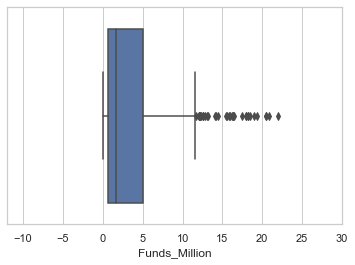

In [22]:
sns.set_style('whitegrid')
ax = sns.boxplot(x="Funds_Million",data=startup_data);
ax.set_xlim(-12,30);

#### Get lower fence from the box plot
From the above box plot, it is approx 0

#### Check the number of outliers greater than upperfence

In [12]:
q1 = startup_data.Funds_Million.quantile(0.25)
q3 = startup_data.Funds_Million.quantile(0.75)
IQR  = q3-q1;
upper_fence = q3+ (1.5 *(IQR))
print(upper_fence, " is upper fence")
no_of_outliers = len(startup_data.Funds_Million.loc[startup_data.Funds_Million > upper_fence])
print("no of outliers greater than upper fence is ",no_of_outliers)

22.569625  is upper fence
no of outliers greater than upper fence is  60


#### Drop the values greater than upper fence

In [13]:
indices = np.where(startup_data.Funds_Million > upper_fence)
print(indices)
startup_data['Greater'] = startup_data.Funds_Million>upper_fence
# print(startup_data.Funds_Million.iloc[indices[1]])

startup_data=startup_data.drop(indices[0])
startup_data

(array([  3,  16,  21,  27,  33,  67,  71,  82,  84,  85,  87,  88, 102,
       111, 117, 121, 122, 127, 129, 140, 144, 146, 153, 157, 183, 187,
       189, 192, 205, 208, 212, 221, 230, 260, 263, 264, 267, 286, 291,
       294, 311, 318, 365, 371, 375, 389, 395, 400, 403, 409, 418, 432,
       433, 436, 437, 438, 439, 440, 443, 445]),)


,index,Startup,Product,Funding,Event,Result,OperatingState,Funds_Million,Greater
0,1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63,False
1,3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00,False
2,5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30,False
4,10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80,False
5,11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00,False
...,...,...,...,...,...,...,...,...,...
434,645,Yap,yapme.com,$10M,TC40 2007,Contestant,Closed,10.00,False
435,646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90,False
441,657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00,False
442,658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00,False


#### Plot the box plot after dropping value

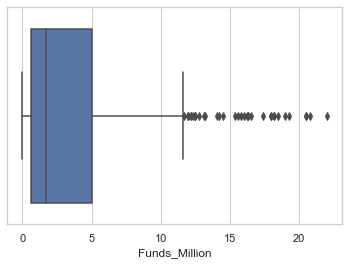

In [14]:
sns.boxplot(x='Funds_Million',data=startup_data);

#### Check frequency of the OperatingState feature classes

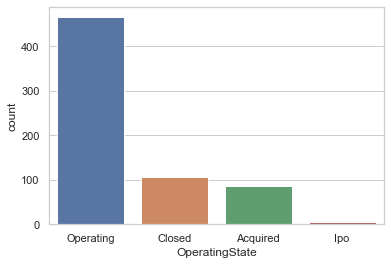

In [15]:
sns.countplot(x='OperatingState',data=final_startup_data);

#### Plot distribution plot for Funds in million

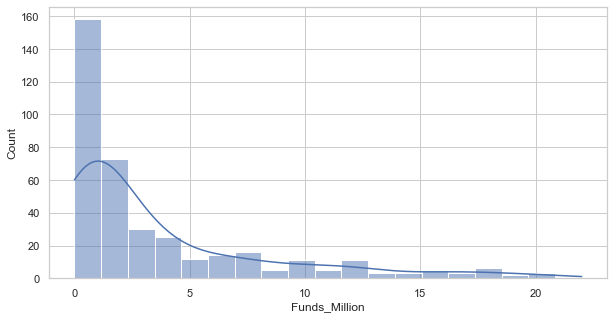

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(startup_data.Funds_Million,kde=True);

#### Plot distribution plots for companies that are still operating and companies that are closed

<AxesSubplot:xlabel='Funds_Million', ylabel='Count'>

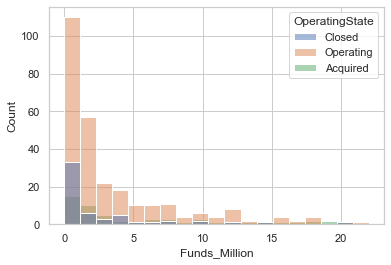

In [21]:
sns.histplot(x="Funds_Million",hue="OperatingState",data=startup_data)

## 4. Statistical Analysis

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php -- to be removed

<b>Null Hypothesis</b>: Average Funds raised by companies that are closed is same as the companies that are still operating

<b>Alternate Hypothesis</b> : Average Funds raised by companies that are closed is less than that of companies operating

In [25]:
funds_operating = startup_data.loc[startup_data.OperatingState=='Operating'].Funds_Million
funds_operating.describe()

count    275.000000
mean       3.517953
std        4.430511
min        0.005000
25%        0.578050
50%        1.700000
75%        4.500000
max       22.000000
Name: Funds_Million, dtype: float64

In [26]:
funds_closed = startup_data.loc[startup_data.OperatingState=='Closed'].Funds_Million
funds_closed.describe()

count    56.000000
mean      2.682423
std       4.060193
min       0.093000
25%       0.443750
50%       0.927100
75%       3.125000
max      20.800000
Name: Funds_Million, dtype: float64

These are 2 different startup groups and are independent.
Hence Let us use <b>Two sample t test</b> to test our hypothesis


In [30]:
from scipy.stats import ttest_ind
t_statistic,p_value = ttest_ind(funds_operating,funds_closed)
print(t_statistic,p_value)

1.3039132895334589 0.1931747168826862


Let's take 5% significance level, we see that
p_value is > 0.05 and hence <b>we failed to reject </b> our null hypothesis

#### Make a copy of original data frame

In [36]:
startup_data_frame = pd.read_csv('DS - Part3 - CompanyX_EU.csv');

#### Check frequency Distribution of Result variable

<AxesSubplot:xlabel='Result', ylabel='count'>

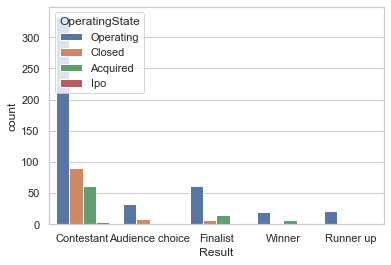

In [40]:
sns.countplot(x='Result',data=startup_data_frame,hue="OperatingState")

In [60]:
startup_data_frame=startup_data_frame.convert_dtypes()
operating_df = startup_data_frame.loc[(startup_data_frame.OperatingState == 'Operating')]
operating_df.groupby(['Result','OperatingState']).count().loc[['Winner','Contestant']]

,,Startup,Product,Funding,Event
Result,OperatingState,,,,
Winner,Operating,19,19,18,19
Contestant,Operating,332,327,215,332


In [57]:
print(operating_df.shape)

(465, 6)


Percentage of winners that are still operating is 
```
(332/465) *100 ~= 71.4%
```
Percentage of contestants that are still operating is 
```
(19/465) * 100 ~= 4%
```


#### Write hypothesis comparing the proportion of companies that are operating between winners and contestants

<b>Alternate Hypothesis</b>: <ins>Proportion</ins> of companies that operate with winners is more than contestants

<b>Null Hypothesis</b>: <ins>Proportion</ins> of companies that operate with winner and contestants is the same.


Let's use test of proportions:

In [66]:
no_of_winners = operating_df.loc[operating_df.Result=='Winner'].shape[0]
no_of_contestants  = operating_df.loc[operating_df.Result=='Contestant'].shape[0]
no_of_operating_companies = operating_df.shape[0]
print(no_of_winners, no_of_contestants,no_of_operating_companies)

19 332 465


In [69]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([no_of_winners,no_of_contestants],[no_of_operating_companies,no_of_operating_companies])
print(pval)
if(pval <0.05):
    print('with pval ',pval, 'we reject the null hypothesis at 5% significance level')
else:
    print('with pval',pval, 'we failed to reject the null hypothesis  5% significance level')
    

1.6757881290464125e-99
with pval  1.6757881290464125e-99 we reject the null hypothesis


#### Check the distribution of Event variable


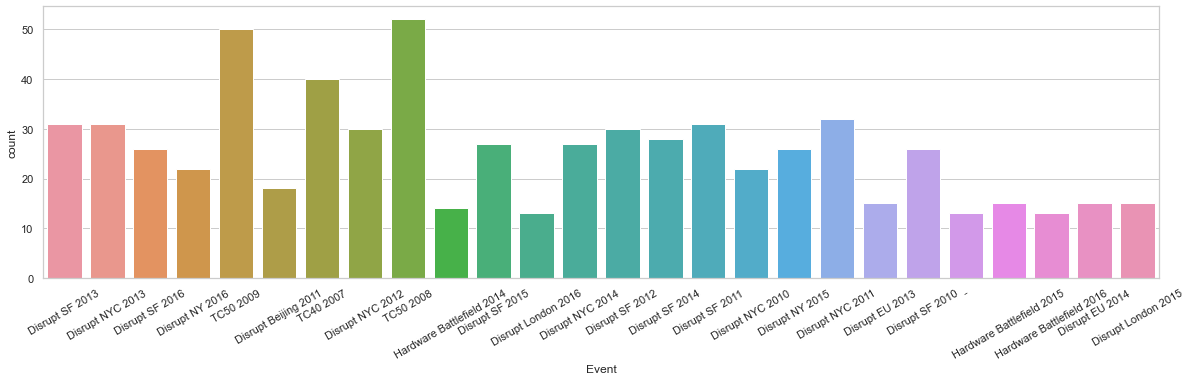

In [74]:
plt.figure(figsize=(20,5));
sns.countplot(x='Event',data=startup_data_frame);
plt.xticks(rotation=30);

#### Select only the Event that has disrupt keyword from 2103 onwards

In [97]:
## This function checks if a given string has Disrupt keyword and has year >=2103

def disruptRow(string):
    str = string.split(' ');
    if(str[0].startswith('Disrupt') and pd.to_numeric(str[2])>= 2013):
        return True;
    return False;

def getCity(string):
#     print('string is ',string)
    str = string.split(' ');
    return str[1];

a = startup_data_frame.Event.apply(disruptRow)

In [102]:
startup_data_frame['Event_disrupt'] = startup_data_frame.Event.loc[a]
startup_data_frame.Event_disrupt.head()

3         Disrupt NY 2016
13        Disrupt SF 2015
14    Disrupt London 2016
16        Disrupt SF 2015
18       Disrupt NYC 2014
Name: Event_disrupt, dtype: string

In [103]:
startup_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3 to 646
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         140 non-null    string
 1   Product         140 non-null    string
 2   Funding         140 non-null    string
 3   Event           140 non-null    string
 4   Result          140 non-null    string
 5   OperatingState  140 non-null    string
 6   Event_disrupt   140 non-null    string
 7   City            140 non-null    object
dtypes: object(1), string(7)
memory usage: 9.8+ KB


In [104]:
startup_data_frame.Event_disrupt.isna().sum()
startup_data_frame.dropna(inplace=True)
startup_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3 to 646
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         140 non-null    string
 1   Product         140 non-null    string
 2   Funding         140 non-null    string
 3   Event           140 non-null    string
 4   Result          140 non-null    string
 5   OperatingState  140 non-null    string
 6   Event_disrupt   140 non-null    string
 7   City            140 non-null    object
dtypes: object(1), string(7)
memory usage: 9.8+ KB


In [108]:
startup_data_frame['City'] = startup_data_frame.Event_disrupt.apply(getCity);
startup_data_frame = startup_data_frame.convert_dtypes()

#### Plot the distribution plot comparing the 3 city events

In [130]:
cities = ['NY','SF','EU']
# startup_data_frame in cities
cities_ny_df = startup_data_frame.loc[startup_data_frame.City =='NY']
cities_sf_df = startup_data_frame.loc[startup_data_frame.City =='SF']
cities_eu_df = startup_data_frame.loc[startup_data_frame.City =='EU']

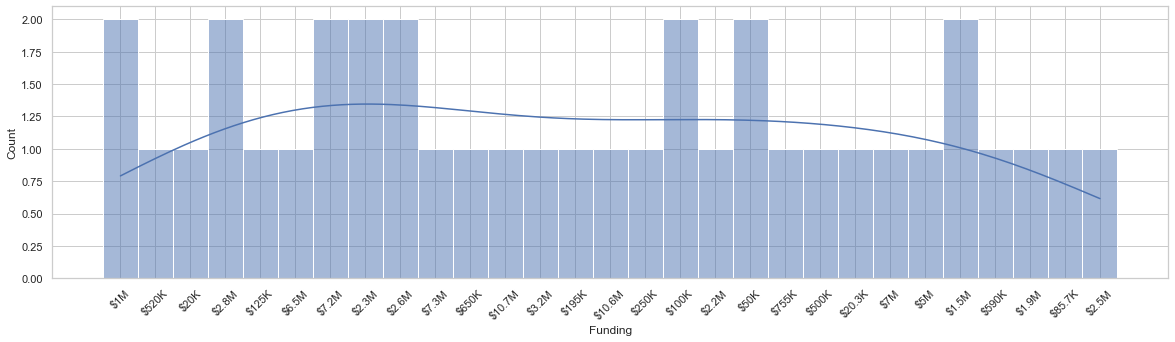

In [129]:
plt.figure(figsize=(20,5))
sns.histplot(x="Funding",data=cities_ny_df,kde=True);
plt.xticks(rotation =45);

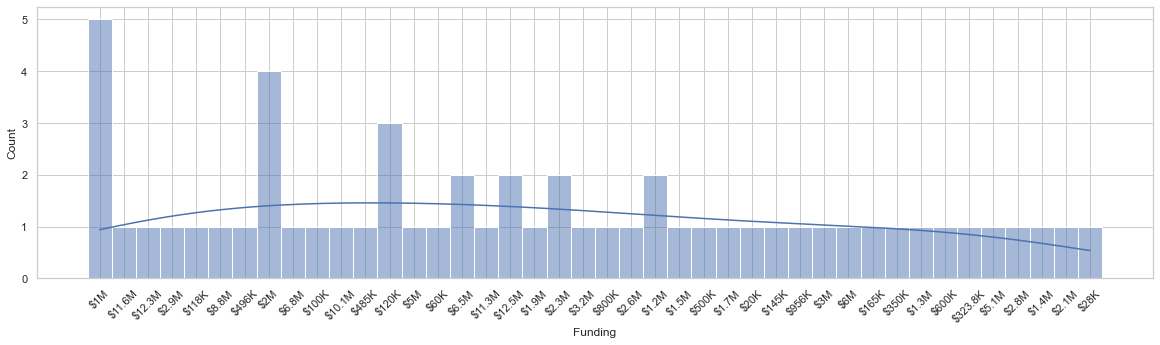

In [131]:
plt.figure(figsize=(20,5))
sns.histplot(x="Funding",data=cities_sf_df,kde=True);
plt.xticks(rotation =45);

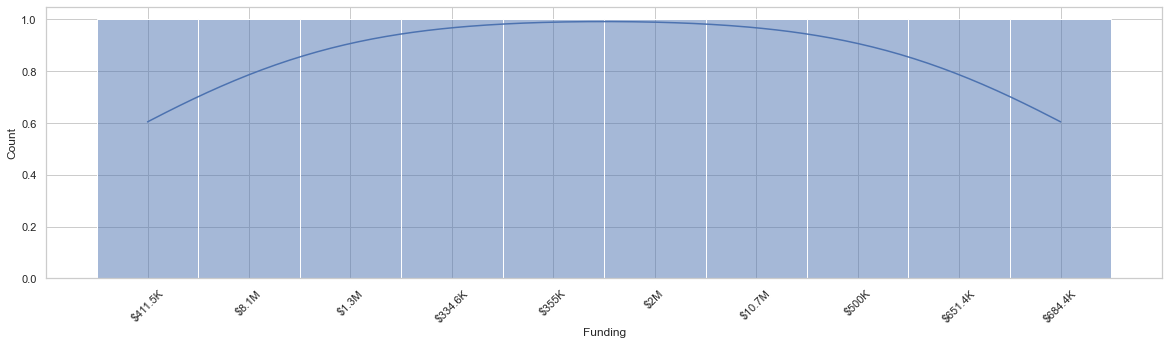

In [132]:
plt.figure(figsize=(20,5))
sns.histplot(x="Funding",data=cities_eu_df,kde=True);
plt.xticks(rotation =45);

#### Lets compare the average Funding raised in the events organized in each of these cities
.1. Bring all the funding entries to one unit : Millions

In [136]:
cities_ny_df.Funds_Million=cities_ny_df.Funding.apply(convertToMillions)
cities_eu_df.Funds_Million=cities_eu_df.Funding.apply(convertToMillions)
cities_sf_df.Funds_Million=cities_sf_df.Funding.apply(convertToMillions)

/home/chamanoor/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [143]:
print(cities_ny_df.Funds_Million.std())
print(cities_eu_df.Funds_Million.std())
print(cities_sf_df.Funds_Million.std())

3.007937041535417
3.721639476971884
3.6649281825826012


<b>Alternate</b> Hypothesis : Average Funds raised during the events across cities is different

<b>Null Hypothesis</b> : Average Funds raised during the events across these cities is same    

Let's use <b>One Way Anova</b>

In [147]:
mean_funds_raised = pd.DataFrame()

df1 = pd.DataFrame({'City':'NY','Funds':cities_ny_df.Funds_Million})
df2 = pd.DataFrame({'City':'EU','Funds':cities_eu_df.Funds_Million})
df3 = pd.DataFrame({'City':'SF','Funds':cities_sf_df.Funds_Million})

mean_funds_raised= mean_funds_raised.append(df1).append(df2).append(df3)

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Funds ~ City',data=mean_funds_raised).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

               sum_sq    df         F  PR(>F)
City         4.722907   2.0  0.198849    0.82
Residual  1175.683796  99.0       NaN     NaN


the pvalue is 0.82 and it is greater than 0.05 (5% significance)

Therefore, we <b>failed to reject</b> null hypothesis
